# Raw Data EDA

In [347]:
%load_ext %autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%autoreload

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

In [192]:
DATAPATH=Path('./data')
assert DATAPATH.exists()

In [659]:
def print_save_path(file):
    print(file.resolve())
    
print_save_path(DATAPATH/'asdf.csv')

/Users/Steve/Google Drive/Personal/NFL-Statistics-Scrape/data/asdf.csv


## Season Level Stats

### Rushing

In [138]:
df = pd.read_csv(DATAPATH/'Career_Stats_Rushing.csv',
                 na_values='--',
                 thousands=',',
                )
df['Longest Rushing Run'] = pd.to_numeric(df['Longest Rushing Run'].str.replace('T',''))
print(df.dtypes)
df.head()

Player Id                             object
Name                                  object
Position                              object
Year                                   int64
Team                                  object
Games Played                           int64
Rushing Attempts                     float64
Rushing Attempts Per Game            float64
Rushing Yards                        float64
Yards Per Carry                      float64
Rushing Yards Per Game               float64
Rushing TDs                          float64
Longest Rushing Run                  float64
Rushing First Downs                  float64
Percentage of Rushing First Downs    float64
Rushing More Than 20 Yards           float64
Rushing More Than 40 Yards           float64
Fumbles                              float64
dtype: object


,Player Id,Name,Position,Year,Team,Games Played,Rushing Attempts,Rushing Attempts Per Game,Rushing Yards,Yards Per Carry,Rushing Yards Per Game,Rushing TDs,Longest Rushing Run,Rushing First Downs,Percentage of Rushing First Downs,Rushing More Than 20 Yards,Rushing More Than 40 Yards,Fumbles
0,ameerabdullah/2552374,"Abdullah, Ameer",RB,2017,Detroit Lions,14,165.0,11.8,552.0,3.3,39.4,4.0,34.0,24.0,14.5,5.0,0.0,2.0
1,ameerabdullah/2552374,"Abdullah, Ameer",RB,2016,Detroit Lions,2,18.0,9.0,101.0,5.6,50.5,0.0,24.0,6.0,33.3,1.0,0.0,0.0
2,ameerabdullah/2552374,"Abdullah, Ameer",RB,2015,Detroit Lions,16,143.0,8.9,597.0,4.2,37.3,2.0,36.0,27.0,18.9,4.0,0.0,4.0
3,nelsonagholor/2552600,"Agholor, Nelson",WR,2017,Philadelphia Eagles,16,1.0,0.1,7.0,7.0,0.4,0.0,7.0,1.0,100.0,0.0,0.0,0.0
4,nelsonagholor/2552600,"Agholor, Nelson",WR,2016,Philadelphia Eagles,15,5.0,0.3,14.0,2.8,0.9,0.0,5.0,0.0,0.0,0.0,0.0,0.0


In [139]:
def check_distinct_by(df, by):
    return df.groupby(by=by).nunique().shape[0] == df.shape[0]

In [140]:

assert check_distinct_by(df, by=['Player Id', 'Year', 'Team']),\
"Index is not distinct"

df_season = pd.DataFrame(df[['Player Id', 'Year', 'Position', 'Team',
                             "Games Played", "Rushing Attempts", "Rushing Attempts Per Game",
                             "Rushing Yards", "Yards Per Carry", "Rushing Yards Per Game",
                             "Rushing TDs", "Longest Rushing Run", "Rushing First Downs",
                             "Percentage of Rushing First Downs", "Rushing More Than 20 Yards",
                             "Rushing More Than 40 Yards", "Fumbles"]],
                         copy=True)

df_season.head()

,Player Id,Year,Position,Team,Games Played,Rushing Attempts,Rushing Attempts Per Game,Rushing Yards,Yards Per Carry,Rushing Yards Per Game,Rushing TDs,Longest Rushing Run,Rushing First Downs,Percentage of Rushing First Downs,Rushing More Than 20 Yards,Rushing More Than 40 Yards,Fumbles
0,ameerabdullah/2552374,2017,RB,Detroit Lions,14,165.0,11.8,552.0,3.3,39.4,4.0,34.0,24.0,14.5,5.0,0.0,2.0
1,ameerabdullah/2552374,2016,RB,Detroit Lions,2,18.0,9.0,101.0,5.6,50.5,0.0,24.0,6.0,33.3,1.0,0.0,0.0
2,ameerabdullah/2552374,2015,RB,Detroit Lions,16,143.0,8.9,597.0,4.2,37.3,2.0,36.0,27.0,18.9,4.0,0.0,4.0
3,nelsonagholor/2552600,2017,WR,Philadelphia Eagles,16,1.0,0.1,7.0,7.0,0.4,0.0,7.0,1.0,100.0,0.0,0.0,0.0
4,nelsonagholor/2552600,2016,WR,Philadelphia Eagles,15,5.0,0.3,14.0,2.8,0.9,0.0,5.0,0.0,0.0,0.0,0.0,0.0


### Receiving

In [141]:
df = pd.read_csv(DATAPATH/'Career_Stats_Receiving.csv',
                 na_values='--',
                 thousands=',',
                )
df['Longest Reception'] = pd.to_numeric(df['Longest Reception'].str.replace('T',''))
print(df.dtypes)
df.head()

Player Id                           object
Name                                object
Position                            object
Year                                 int64
Team                                object
Games Played                         int64
Receptions                         float64
Receiving Yards                    float64
Yards Per Reception                float64
Yards Per Game                     float64
Longest Reception                  float64
Receiving TDs                      float64
Receptions Longer than 20 Yards    float64
Receptions Longer than 40 Yards    float64
First Down Receptions              float64
Fumbles                            float64
dtype: object


,Player Id,Name,Position,Year,Team,Games Played,Receptions,Receiving Yards,Yards Per Reception,Yards Per Game,Longest Reception,Receiving TDs,Receptions Longer than 20 Yards,Receptions Longer than 40 Yards,First Down Receptions,Fumbles
0,ameerabdullah/2552374,"Abdullah, Ameer",RB,2017,Detroit Lions,14,25.0,162.0,6.5,11.6,22.0,1.0,1.0,0.0,13.0,0.0
1,ameerabdullah/2552374,"Abdullah, Ameer",RB,2016,Detroit Lions,2,5.0,57.0,11.4,28.5,18.0,1.0,0.0,0.0,4.0,0.0
2,ameerabdullah/2552374,"Abdullah, Ameer",RB,2015,Detroit Lions,16,25.0,183.0,7.3,11.4,36.0,1.0,1.0,0.0,11.0,0.0
3,davanteadams/2543495,"Adams, Davante",WR,2017,Green Bay Packers,14,74.0,885.0,12.0,63.2,55.0,10.0,8.0,3.0,45.0,0.0
4,davanteadams/2543495,"Adams, Davante",WR,2016,Green Bay Packers,16,75.0,997.0,13.3,62.3,66.0,12.0,17.0,4.0,45.0,2.0


In [142]:
assert check_distinct_by(df, by=['Player Id', 'Year', 'Team']),\
"Index is not distinct"

In [143]:
df_tmp = df[['Player Id', 'Year', 'Team', "Games Played",
             'Receptions', 'Receiving Yards', 'Yards Per Reception', 'Yards Per Game',
             'Longest Reception', 'Receiving TDs', 'Receptions Longer than 20 Yards',
             'Receptions Longer than 40 Yards', 'First Down Receptions', 'Fumbles']].copy()

df_tmp.rename(columns={'Fumbles': 'Fumbles Rec', 'Games Played': 'Games Played Rec'}, inplace=True)

df_season = pd.merge(df_season, df_tmp, how='outer', on=['Player Id', 'Year', 'Team'])

In [144]:
print(df_season.dtypes)
df_season.head()

Player Id                             object
Year                                   int64
Position                              object
Team                                  object
Games Played                         float64
Rushing Attempts                     float64
Rushing Attempts Per Game            float64
Rushing Yards                        float64
Yards Per Carry                      float64
Rushing Yards Per Game               float64
Rushing TDs                          float64
Longest Rushing Run                  float64
Rushing First Downs                  float64
Percentage of Rushing First Downs    float64
Rushing More Than 20 Yards           float64
Rushing More Than 40 Yards           float64
Fumbles                              float64
Games Played Rec                     float64
Receptions                           float64
Receiving Yards                      float64
Yards Per Reception                  float64
Yards Per Game                       float64
Longest Re

,Player Id,Year,Position,Team,Games Played,Rushing Attempts,Rushing Attempts Per Game,Rushing Yards,Yards Per Carry,Rushing Yards Per Game,...,Receptions,Receiving Yards,Yards Per Reception,Yards Per Game,Longest Reception,Receiving TDs,Receptions Longer than 20 Yards,Receptions Longer than 40 Yards,First Down Receptions,Fumbles Rec
0,ameerabdullah/2552374,2017,RB,Detroit Lions,14.0,165.0,11.8,552.0,3.3,39.4,...,25.0,162.0,6.5,11.6,22.0,1.0,1.0,0.0,13.0,0.0
1,ameerabdullah/2552374,2016,RB,Detroit Lions,2.0,18.0,9.0,101.0,5.6,50.5,...,5.0,57.0,11.4,28.5,18.0,1.0,0.0,0.0,4.0,0.0
2,ameerabdullah/2552374,2015,RB,Detroit Lions,16.0,143.0,8.9,597.0,4.2,37.3,...,25.0,183.0,7.3,11.4,36.0,1.0,1.0,0.0,11.0,0.0
3,nelsonagholor/2552600,2017,WR,Philadelphia Eagles,16.0,1.0,0.1,7.0,7.0,0.4,...,62.0,768.0,12.4,48.0,72.0,8.0,9.0,3.0,35.0,0.0
4,nelsonagholor/2552600,2016,WR,Philadelphia Eagles,15.0,5.0,0.3,14.0,2.8,0.9,...,36.0,365.0,10.1,24.3,40.0,2.0,3.0,1.0,15.0,1.0


In [158]:
df_rb = df_season[df_season['Position'] == 'RB']
df_rb.describe().T
df_rb = df_rb[['Player Id', 'Year', 'Team', 'Fumbles', 'Fumbles Rec']]
# df_rb['Games Played'] = df_rb['Games Played'].combine_first(df_rb['Games Played Rec'])
df_rb['f'] = df_rb['Fumbles'] + df_rb['Fumbles Rec']
df_rb

,Player Id,Year,Team,Fumbles,Fumbles Rec,f
0,ameerabdullah/2552374,2017,Detroit Lions,2.0,0.0,2.0
1,ameerabdullah/2552374,2016,Detroit Lions,0.0,0.0,0.0
2,ameerabdullah/2552374,2015,Detroit Lions,4.0,0.0,4.0
7,jayajayi/2552582,2017,Philadelphia Eagles,2.0,0.0,2.0
8,jayajayi/2552582,2017,Miami Dolphins,1.0,0.0,1.0
9,jayajayi/2552582,2016,Miami Dolphins,4.0,0.0,4.0
10,jayajayi/2552582,2015,Miami Dolphins,0.0,0.0,0.0
17,javoriusallen/2552631,2017,Baltimore Ravens,0.0,0.0,0.0
18,javoriusallen/2552631,2016,Baltimore Ravens,0.0,0.0,0.0
19,javoriusallen/2552631,2015,Baltimore Ravens,2.0,0.0,2.0


In [190]:
def check_distinct_by(df, by):
    return df.groupby(by=by).nunique().shape[0] == df.shape[0]

# season rushing
df = pd.read_csv(DATAPATH/'Career_Stats_Rushing.csv',
                 na_values='--',
                 thousands=','
                )
# remove Touchdown indicator
df['Longest Rushing Run'] = pd.to_numeric(df['Longest Rushing Run'].str.replace('T',''))

assert check_distinct_by(df, by=['Player Id', 'Year', 'Team']),\
"Index is not distinct"

# insert rushing into df
df_season = pd.DataFrame(df[['Player Id', 'Year', 'Position', 'Team',
                             "Games Played", "Rushing Attempts", "Rushing Attempts Per Game",
                             "Rushing Yards", "Yards Per Carry", "Rushing Yards Per Game",
                             "Rushing TDs", "Longest Rushing Run", "Rushing First Downs",
                             "Percentage of Rushing First Downs", "Rushing More Than 20 Yards",
                             "Rushing More Than 40 Yards"]],
                         copy=True)


# season receiving
df = pd.read_csv(DATAPATH/'Career_Stats_Receiving.csv',
                 na_values='--',
                 thousands=','
                )
# remove touchdown indicator
df['Longest Reception'] = pd.to_numeric(df['Longest Reception'].str.replace('T',''))

assert check_distinct_by(df, by=['Player Id', 'Year', 'Team']),\
"Index is not distinct"

df_tmp = df[['Player Id', 'Year', 'Team', 'Games Played',
             'Receptions', 'Receiving Yards', 'Yards Per Reception', 'Yards Per Game',
             'Longest Reception', 'Receiving TDs', 'Receptions Longer than 20 Yards',
             'Receptions Longer than 40 Yards', 'First Down Receptions']].copy()

df_tmp.rename(columns={'Games Played': 'Games Played Rec'}, inplace=True)

df_season = pd.merge(df_season, df_tmp, how='outer', on=['Player Id', 'Year', 'Team'])

# bring in fumbles
df = pd.read_csv(DATAPATH/'Career_Stats_Fumbles.csv',
                 na_values='--',
                 thousands=','
                )

assert check_distinct_by(df, by=['Player Id', 'Year', 'Team']),\
"Index is not distinct"

df_tmp = df[['Player Id', 'Year', 'Team', 'Fumbles', 'Fumbles Lost']].copy()
df_tmp.fillna(0, inplace=True)

df_season = pd.merge(df_season, df_tmp, how='left', on=['Player Id', 'Year', 'Team'])

# Create RB Data
df_rb = df_season[df_season['Position'] == 'RB'].copy()

df_rb['Games Played'] = df_rb['Games Played'].combine_first(df_rb['Games Played Rec'])
df_rb.drop(['Games Played Rec'], axis=1, inplace=True)

df_wr = df_season[df_season['Position'] == 'WR']

In [191]:
df_wr.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,599.0,2014.372287,2.401219,2004.0,2013.000,2015.00,2016.00,2017.0
Games Played,599.0,12.747913,4.465950,0.0,11.000,15.00,16.00,16.0
Rushing Attempts,350.0,3.917143,5.403118,0.0,1.000,3.00,5.00,83.0
Rushing Attempts Per Game,599.0,0.177963,0.394208,0.0,0.000,0.10,0.20,7.5
Rushing Yards,350.0,25.765714,42.878545,-14.0,5.250,13.00,34.75,576.0
Yards Per Carry,349.0,6.286819,7.081938,-14.0,3.000,5.50,8.50,60.0
Rushing Yards Per Game,350.0,2.005429,3.785010,-6.0,0.400,1.00,2.50,52.4
Rushing TDs,350.0,0.097143,0.381135,0.0,0.000,0.00,0.00,3.0
Longest Rushing Run,349.0,13.521490,13.775612,-14.0,5.000,10.00,17.00,93.0
Rushing First Downs,350.0,1.282857,2.023499,0.0,0.000,1.00,2.00,27.0


In [183]:
df_rb[df_rb['Fumbles'].isnull()]

,Player Id,Year,Position,Team,Games Played,Rushing Attempts,Rushing Attempts Per Game,Rushing Yards,Yards Per Carry,Rushing Yards Per Game,...,Receiving Yards,Yards Per Reception,Yards Per Game,Longest Reception,Receiving TDs,Receptions Longer than 20 Yards,Receptions Longer than 40 Yards,First Down Receptions,Fumbles,Fumbles Lost
55,cameronartis-payne/2552375,2017,RB,Carolina Panthers,13.0,18.0,1.4,95.0,5.3,7.3,...,2.0,2.0,0.2,2.0,0.0,0.0,0.0,0.0,NaN,NaN
56,cameronartis-payne/2552375,2016,RB,Carolina Panthers,3.0,36.0,12.0,144.0,4.0,48.0,...,11.0,11.0,3.7,11.0,0.0,0.0,0.0,1.0,NaN,NaN
57,cameronartis-payne/2552375,2015,RB,Carolina Panthers,7.0,45.0,6.4,183.0,4.1,26.1,...,58.0,11.6,8.3,20.0,0.0,1.0,0.0,4.0,NaN,NaN
123,kapribibbs/2550542,2017,RB,Washington Redskins,3.0,21.0,7.0,79.0,3.8,26.3,...,128.0,9.1,42.7,36.0,1.0,2.0,0.0,4.0,NaN,NaN
124,kapribibbs/2550542,2016,RB,Denver Broncos,12.0,29.0,2.4,129.0,4.4,10.8,...,75.0,37.5,6.2,69.0,1.0,1.0,1.0,1.0,NaN,NaN
125,kapribibbs/2550542,2015,RB,Denver Broncos,1.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,kapribibbs/2550542,2014,RB,Denver Broncos,0.0,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,tommybohanon/2540225,2017,RB,Jacksonville Jaguars,16.0,5.0,0.3,5.0,1.0,0.3,...,43.0,7.2,2.7,14.0,1.0,0.0,0.0,3.0,NaN,NaN
143,tommybohanon/2540225,2015,RB,New York Jets,16.0,2.0,0.1,2.0,1.0,0.1,...,56.0,14.0,3.5,23.0,0.0,1.0,0.0,3.0,NaN,NaN
144,tommybohanon/2540225,2014,RB,New York Jets,4.0,1.0,0.2,3.0,3.0,0.8,...,30.0,15.0,7.5,16.0,0.0,0.0,0.0,2.0,NaN,NaN


In [168]:
df = pd.read_csv(DATAPATH/'Career_Stats_Fumbles.csv',
                 na_values='--',
                 thousands=','
                )

assert check_distinct_by(df, by=['Player Id', 'Year', 'Team']),\
"Index is not distinct"

df_tmp = df[['Player Id', 'Year', 'Team', 'Fumbles', 'Fumbles Lost']].copy()
df_tmp.fillna(0, inplace=True)
df_tmp.head()

df_season = pd.merge(df_season, df_tmp, how='left', on=['Player Id', 'Year', 'Team'])

,Player Id,Year,Team,Fumbles,Fumbles Lost
0,ameerabdullah/2552374,2017,Detroit Lions,2.0,1.0
1,ameerabdullah/2552374,2016,Detroit Lions,0.0,0.0
2,ameerabdullah/2552374,2015,Detroit Lions,5.0,2.0
3,davanteadams/2543495,2017,Green Bay Packers,0.0,0.0
4,davanteadams/2543495,2016,Green Bay Packers,2.0,1.0


### Clustering

In [219]:
df = pd.read_csv(DATAPATH/'interim'/'rb_career_stats.csv')
print(df.dtypes)
df.head()

Player Id                             object
Year                                   int64
Position                              object
Team                                  object
Games Played                         float64
Rushing Attempts                     float64
Rushing Attempts Per Game            float64
Rushing Yards                        float64
Yards Per Carry                      float64
Rushing Yards Per Game               float64
Rushing TDs                          float64
Longest Rushing Run                  float64
Rushing First Downs                  float64
Percentage of Rushing First Downs    float64
Rushing More Than 20 Yards           float64
Rushing More Than 40 Yards           float64
Receptions                           float64
Receiving Yards                      float64
Yards Per Reception                  float64
Yards Per Game                       float64
Longest Reception                    float64
Receiving TDs                        float64
Receptions

,Player Id,Year,Position,Team,Games Played,Rushing Attempts,Rushing Attempts Per Game,Rushing Yards,Yards Per Carry,Rushing Yards Per Game,...,Receiving Yards,Yards Per Reception,Yards Per Game,Longest Reception,Receiving TDs,Receptions Longer than 20 Yards,Receptions Longer than 40 Yards,First Down Receptions,Fumbles,Fumbles Lost
0,ameerabdullah/2552374,2017,RB,Detroit Lions,14.0,165.0,11.8,552.0,3.3,39.4,...,162.0,6.5,11.6,22.0,1.0,1.0,0.0,13.0,2.0,1.0
1,ameerabdullah/2552374,2016,RB,Detroit Lions,2.0,18.0,9.0,101.0,5.6,50.5,...,57.0,11.4,28.5,18.0,1.0,0.0,0.0,4.0,0.0,0.0
2,ameerabdullah/2552374,2015,RB,Detroit Lions,16.0,143.0,8.9,597.0,4.2,37.3,...,183.0,7.3,11.4,36.0,1.0,1.0,0.0,11.0,5.0,2.0
3,jayajayi/2552582,2017,RB,Philadelphia Eagles,7.0,70.0,10.0,408.0,5.8,58.3,...,91.0,9.1,13.0,32.0,1.0,1.0,0.0,6.0,2.0,1.0
4,jayajayi/2552582,2017,RB,Miami Dolphins,7.0,138.0,19.7,465.0,3.4,66.4,...,67.0,4.8,9.6,15.0,0.0,0.0,0.0,2.0,1.0,1.0


In [337]:
# features = list(df.columns[4:])
features = ['Games Played', 'Rushing Attempts',
            'Rushing Attempts Per Game', 'Yards Per Carry', 'Rushing Yards Per Game',
            'Rushing First Downs', 'Percentage of Rushing First Downs',
            'Rushing More Than 20 Yards', 'Rushing More Than 40 Yards',
            'Receptions', 'Yards Per Reception', 'Yards Per Game', 'Receiving Yards',
            'Rushing TDs', 'Receiving TDs'
           ]

In [345]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

ss = StandardScaler()
X_train = ss.fit_transform(df[features])

pca = PCA()
pca_tr = pca.fit_transform(X_train)

km = KMeans(n_clusters=5)
# km.fit(X_train)
km.fit(pca_tr)
# pred = km.predict(X_train)
pred = km.labels_


df2 = df.copy()
df2['pred'] = pd.Series(pred)
# df2.to_csv(DATAPATH/'tmp.csv')
# df2[df2['Year'] == 2017]

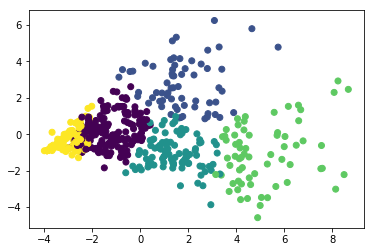

In [346]:
plt.scatter(pca_tr[:,0], pca_tr[:,1], c=pred)

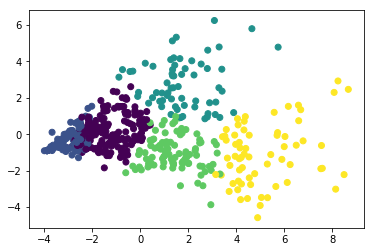

In [344]:
plt.scatter(pca_tr[:,0], pca_tr[:,1], c=pred)

In [309]:
idx = np.argwhere(pca_tr[:, 1] > 2)

In [310]:
df[['Player Id', 'Year', 'Team', 'Games Played', 'Rushing Yards']].iloc[np.squeeze(idx)]

,Player Id,Year,Team,Games Played,Rushing Yards
18,georgeatkinson/2550540,2016,Cleveland Browns,16.0,34.0
22,tavonaustin/2539336,2015,St. Louis Rams,16.0,434.0
23,tavonaustin/2539336,2014,St. Louis Rams,15.0,224.0
24,tavonaustin/2539336,2013,St. Louis Rams,13.0,151.0
60,tommybohanon/2540225,2014,New York Jets,4.0,3.0
150,jalstonfowler/2552464,2015,Tennessee Titans,16.0,13.0
176,coreygrant/2553650,2017,Jacksonville Jaguars,16.0,248.0
239,kylejuszczyk/2540230,2017,San Francisco 49ers,14.0,31.0
240,kylejuszczyk/2540230,2016,Baltimore Ravens,16.0,22.0
257,zachline/2539303,2017,New Orleans Saints,12.0,28.0


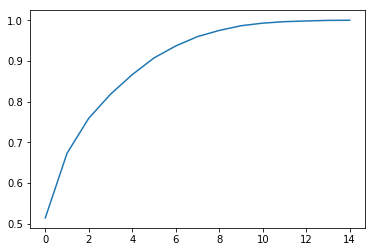

In [340]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

## Game Level Stats

In [371]:
df_rb = pd.read_csv(DATAPATH/'Game_Logs_Runningback.csv',
                    na_values='--',
                    parse_dates={'gameDate' : ['Game Date', 'Year']},
                    keep_date_col=True
                    )
df_rb['Year'] = df_rb['Year'].astype(np.int)
df_rb['Longest Rushing Run'] = pd.to_numeric(df_rb['Longest Rushing Run'].str.replace('T',''))
df_rb['Longest Reception'] = pd.to_numeric(df_rb['Longest Reception'].str.replace('T',''))
df_rb = df_rb[df_rb['Season'] == 'Regular Season']

print(df_rb.dtypes)
print(df_rb.shape)
df_rb.head()

gameDate               datetime64[ns]
Player Id                      object
Name                           object
Position                       object
Year                            int64
Season                         object
Week                            int64
Game Date                      object
Home or Away                   object
Opponent                       object
Outcome                        object
Score                          object
Games Played                    int64
Games Started                   int64
Rushing Attempts              float64
Rushing Yards                 float64
Yards Per Carry               float64
Longest Rushing Run           float64
Rushing TDs                   float64
Receptions                    float64
Receiving Yards               float64
Yards Per Reception           float64
Longest Reception             float64
Receiving TDs                 float64
Fumbles                       float64
Fumbles Lost                  float64
dtype: objec

,gameDate,Player Id,Name,Position,Year,Season,Week,Game Date,Home or Away,Opponent,...,Yards Per Carry,Longest Rushing Run,Rushing TDs,Receptions,Receiving Yards,Yards Per Reception,Longest Reception,Receiving TDs,Fumbles,Fumbles Lost
6,2017-09-10,ameerabdullah/2552374,"Abdullah, Ameer",RB,2017,Regular Season,1,09/10,Home,ARI,...,2.0,7.0,0.0,3.0,11.0,3.7,6.0,0.0,NaN,NaN
7,2017-09-18,ameerabdullah/2552374,"Abdullah, Ameer",RB,2017,Regular Season,2,09/18,Away,NYG,...,5.1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2017-09-24,ameerabdullah/2552374,"Abdullah, Ameer",RB,2017,Regular Season,3,09/24,Home,ATL,...,3.4,11.0,0.0,3.0,39.0,13.0,22.0,0.0,NaN,NaN
9,2017-10-01,ameerabdullah/2552374,"Abdullah, Ameer",RB,2017,Regular Season,4,10/01,Away,MIN,...,4.7,29.0,1.0,3.0,15.0,5.0,8.0,0.0,NaN,NaN
10,2017-10-08,ameerabdullah/2552374,"Abdullah, Ameer",RB,2017,Regular Season,5,10/08,Home,CAR,...,3.1,16.0,0.0,1.0,3.0,3.0,3.0,0.0,NaN,NaN


### Build Fantasy Points

In [401]:
points_map = {'Complete Passes': 0.2,
              'Incomplete Passes': -0.2,
              'Passing Yards': 1/25,
              'Passing Bonus 1': (300, 2),
              'Passing Bonus 2': (400, 2),
              'Passing Bonus 3': (500, 3),
              'Passing TDs': 4,
              'Interceptions': -2,
              'Rushing Yards': 1/10,
              'Rushing Bonus 1': (100, 2),
              'Rushing Bonus 2': (150, 3),
              'Rushing Bonus 3': (200, 5),
              'Rushing TDs': 6,
              'Receptions': 0.4,
              'Receiving Yards': 1/10,
              'Receiving Bonus 1': (100, 1.5),
              'Receiving Bonus 2': (150, 2),
              'Receiving Bonus 3': (200, 3),
              'Receiving TDs': 6,
              'Two Point Conversion': 2,
              'Fumbles Lost': -2,
              '40+ Yard Completions': 1,
              '40+ Yard Passing TDs': 1,
              '40+ Yard Run': 1.5,
              '40+ Yard Rushing TDs': 2,
              '40+ Yard Receptions': 1.5,
              '40+ Yard Receiving TDs': 1.5
             }

def apply_bonus(x, bonus_pts):
    
    total_pts = 0
    for bp in bonus_pts:
        bonus_threshold, bonus_points = bp
        if x >= bonus_threshold:
            total_pts += bonus_points
            
    return total_pts
    

In [405]:
[points_map['Receiving Bonus 1']]

[(100, 1.5)]

In [618]:
df_fp = df_rb[['Player Id', 'Year', 'Week', 'Games Played', 'Games Started',
               'Rushing Yards', 'Rushing TDs', 'Longest Rushing Run',
               'Receptions', 'Receiving Yards', 'Receiving TDs', 'Longest Reception',
               'Fumbles', 'Fumbles Lost'
              ]].copy()
# df_fp.fillna(0, inplace=True)

# apply fantasy point rules
df_fp['Rushing Yards pts'] = df_fp['Rushing Yards'] * points_map['Rushing Yards']
df_fp['Receiving Yards pts'] = df_fp['Receiving Yards'] * points_map['Receiving Yards']
df_fp['Rushing TDs pts'] = df_fp['Rushing TDs'] * points_map['Rushing TDs']
df_fp['Receiving TDs pts'] = df_fp['Receiving TDs'] * points_map['Receiving TDs']
df_fp['Receptions pts'] = df_fp['Receptions'] * points_map['Receptions']

bonus_pts = [points_map['Rushing Bonus 1'],
             points_map['Rushing Bonus 2'],
             points_map['Rushing Bonus 3']]
df_fp['Rushing Bonus pts'] = df_fp['Rushing Yards']\
.apply(apply_bonus, bonus_pts=bonus_pts)

bonus_pts = [points_map['Rushing Bonus 1'],
             points_map['Rushing Bonus 2'],
             points_map['Rushing Bonus 3']]
df_fp['Receiving Bonus pts'] = df_fp['Receiving Yards']\
.apply(apply_bonus, bonus_pts=bonus_pts)

all_pts = list(df_fp.columns[-7:])
df_fp['Total pts'] = np.sum(df_fp[all_pts], axis=1)
df_fp['Total pts active'] = np.where(df_fp['Games Played'] == 1, df_fp['Total pts'], 0)
df_fp['Total pts started'] = np.where(df_fp['Games Started'] == 1, df_fp['Total pts'], 0)


In [660]:
all_pts

['Rushing Yards pts',
 'Receiving Yards pts',
 'Rushing TDs pts',
 'Receiving TDs pts',
 'Receptions pts',
 'Rushing Bonus pts',
 'Receiving Bonus pts']

In [651]:
df_fp[df_fp['Player Id'] == 'aaronjones/2558116']

,Player Id,Year,Week,Games Played,Games Started,Rushing Yards,Rushing TDs,Longest Rushing Run,Receptions,Receiving Yards,...,Rushing Yards pts,Receiving Yards pts,Rushing TDs pts,Receiving TDs pts,Receptions pts,Rushing Bonus pts,Receiving Bonus pts,Total pts,Total pts active,Total pts started
4934,aaronjones/2558116,2017,1,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0
4935,aaronjones/2558116,2017,2,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0
4936,aaronjones/2558116,2017,3,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0
4937,aaronjones/2558116,2017,4,1,0,49.0,1.0,11.0,NaN,NaN,...,4.9,NaN,6.0,NaN,NaN,0,0,10.9,10.9,0.0
4938,aaronjones/2558116,2017,5,1,1,125.0,1.0,22.0,1.0,9.0,...,12.5,0.9,6.0,0.0,0.4,2,0,21.8,21.8,21.8
4939,aaronjones/2558116,2017,6,1,0,41.0,0.0,9.0,1.0,1.0,...,4.1,0.1,0.0,0.0,0.4,0,0,4.6,4.6,0.0
4940,aaronjones/2558116,2017,7,1,1,131.0,1.0,46.0,3.0,7.0,...,13.1,0.7,6.0,0.0,1.2,2,0,23.0,23.0,23.0
4941,aaronjones/2558116,2017,9,1,1,12.0,0.0,4.0,2.0,-1.0,...,1.2,-0.1,0.0,0.0,0.8,0,0,1.9,1.9,1.9
4942,aaronjones/2558116,2017,10,1,1,12.0,0.0,6.0,1.0,0.0,...,1.2,0.0,0.0,0.0,0.4,0,0,1.6,1.6,1.6
4943,aaronjones/2558116,2017,11,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0.0,0.0,0.0


In [641]:
df_fp_season = df_fp[['Player Id', 'Year'] + 
                     all_pts + 
                     ['Total pts', 'Total pts active', 'Total pts started', 'Games Played', 'Games Started']]\
.groupby(by=['Player Id', 'Year'], sort=False)\
.agg(['sum', 'mean'])

df_fp_season.columns = [' '.join(col).strip() for col in df_fp_season.columns.values]
df_fp_season.reset_index(inplace=True)

df_fp_season['Avg pts per Games Played'] = df_fp_season['Total pts active sum'] / df_fp_season['Games Played sum']
df_fp_season['Avg pts per Games Started'] = df_fp_season['Total pts started sum'] / df_fp_season['Games Started sum']
df_fp_season['Percentage Played Games'] = df_fp_season['Games Played sum'] / 16
df_fp_season.rename(columns={'Games Started mean': 'Percentage Started Games'}, inplace=True)
df_fp_season.replace([np.inf, -np.inf], np.nan, inplace=True)
df_fp_season.drop(['Total pts started mean', 'Total pts active mean'], axis=1, inplace=True)


In [642]:
df_fp_season[df_fp_season['Player Id'] == 'aaronjones/2558116'].head()
df_fp_season[df_fp_season['Player Id'] == 'lamarmiller/2533034'].head()

# df_fp_season
# df_fp_season.head()

,Player Id,Year,Rushing Yards pts sum,Rushing Yards pts mean,Receiving Yards pts sum,Receiving Yards pts mean,Rushing TDs pts sum,Rushing TDs pts mean,Receiving TDs pts sum,Receiving TDs pts mean,...,Total pts mean,Total pts active sum,Total pts started sum,Games Played sum,Games Played mean,Games Started sum,Percentage Started Games,Avg pts per Games Played,Avg pts per Games Started,Percentage Played Games
332,lamarmiller/2533034,2017,88.8,5.550000,32.7,2.180000,18.0,1.125000,18.0,1.200000,...,10.74375,171.9,146.2,16,1.000,13,0.8125,10.743750,11.246154,1.000
333,lamarmiller/2533034,2016,107.3,7.664286,18.8,1.446154,30.0,2.142857,6.0,0.461538,...,11.40625,182.5,182.5,14,0.875,14,0.8750,13.035714,13.035714,0.875
334,lamarmiller/2533034,2015,87.2,5.450000,39.7,2.646667,48.0,3.000000,12.0,0.800000,...,13.41875,214.7,214.7,16,1.000,16,1.0000,13.418750,13.418750,1.000
335,lamarmiller/2533034,2014,109.9,6.868750,27.5,1.718750,48.0,3.000000,6.0,0.375000,...,13.35000,213.6,213.6,16,1.000,16,1.0000,13.350000,13.350000,1.000
336,lamarmiller/2533034,2013,70.9,4.431250,17.0,1.214286,12.0,0.750000,0.0,0.000000,...,7.01875,112.3,107.2,16,1.000,15,0.9375,7.018750,7.146667,1.000


In [649]:
# add rank
# df_test = df_fp_season.groupby(['Year'])\
# .apply(pd.DataFrame.sort_values, 'Total pts sum', ascending=False)

df_fp_season['Sum Fantasy Rank'] = df_fp_season\
    .groupby(['Year'])['Total pts sum']\
    .rank(ascending=False)
df_fp_season['Avg Fantasy Rank'] = df_fp_season\
    .groupby(['Year'])['Total pts mean']\
    .rank(ascending=False)
df_fp_season['Avg pts Played Rank'] = df_fp_season\
    .groupby(['Year'])['Avg pts per Games Played']\
    .rank(ascending=False)
df_fp_season['Avg pts Started Rank'] = df_fp_season\
    .groupby(['Year'])['Avg pts per Games Started']\
    .rank(ascending=False)

# df_fp_season['Rank Diff'] = (df_fp_season['Sum Fantasy Rank'] - df_fp_season['Avg pts Played Rank'])

# df_fp_season[(df_fp_season['Sum Fantasy Rank'] < 50) & (df_fp_season['Rank Diff'] > 15)].head(20)

,Player Id,Year,Rushing Yards pts sum,Rushing Yards pts mean,Receiving Yards pts sum,Receiving Yards pts mean,Rushing TDs pts sum,Rushing TDs pts mean,Receiving TDs pts sum,Receiving TDs pts mean,...,Games Started sum,Percentage Started Games,Avg pts per Games Played,Avg pts per Games Started,Percentage Played Games,Sum Fantasy Rank,Avg Fantasy Rank,Avg pts Played Rank,Avg pts Started Rank,Rank Diff
10,c.j.anderson/2540269,2016,43.7,6.242857,12.8,2.133333,24.0,3.428571,6.0,1.000000,...,7,1.000000,13.557143,13.557143,0.4375,39.0,11.0,13.0,24.0,26.0
33,le'veonbell/2540175,2015,55.6,9.266667,13.6,2.720000,18.0,3.000000,0.0,0.000000,...,6,1.000000,17.133333,17.133333,0.3750,32.0,2.0,2.0,7.0,30.0
82,rexburkhead/2539265,2017,26.4,2.640000,25.4,2.540000,30.0,3.000000,18.0,1.800000,...,3,0.187500,11.180000,9.200000,0.6250,36.0,42.0,18.0,39.0,18.0
169,mikegillislee/2539663,2015,26.7,5.340000,2.9,0.580000,18.0,3.600000,0.0,0.000000,...,1,0.200000,10.000000,17.700000,0.3125,44.0,18.0,21.0,5.0,23.0
218,carloshyde/2543743,2015,47.0,6.714286,5.3,0.883333,18.0,2.571429,0.0,0.000000,...,7,0.583333,11.385714,11.385714,0.4375,38.0,36.0,14.0,23.0,24.0
251,mattjones/2552635,2016,46.0,6.571429,7.3,1.460000,18.0,2.571429,0.0,0.000000,...,7,0.437500,11.214286,11.214286,0.4375,47.0,51.0,23.0,39.0,24.0
277,dionlewis/2495469,2015,23.4,3.342857,38.8,5.542857,12.0,1.714286,12.0,1.714286,...,6,0.750000,14.371429,13.500000,0.4375,33.5,7.0,6.0,15.0,27.5
287,marshawnlynch/2495663,2015,41.7,5.957143,8.0,1.333333,18.0,2.571429,0.0,0.000000,...,6,0.375000,10.700000,12.033333,0.4375,39.0,40.0,17.0,20.0,22.0
304,dougmartin/2532899,2016,42.1,5.262500,13.4,2.233333,18.0,2.250000,0.0,0.000000,...,8,0.533333,9.887500,9.887500,0.5000,46.0,48.0,27.0,43.0,19.0
406,stevanridley/2495470,2014,34.0,5.666667,2.0,0.500000,12.0,2.000000,0.0,0.000000,...,5,0.833333,8.933333,10.160000,0.3750,32.0,12.0,14.0,19.0,18.0


In [609]:
df_fp_season[df_fp_season['Year'] == 2017].sort_values(['Avg pts Started Rank'])

,Player Id,Year,Rushing Yards pts sum,Rushing Yards pts mean,Receiving Yards pts sum,Receiving Yards pts mean,Rushing TDs pts sum,Rushing TDs pts mean,Receiving TDs pts sum,Receiving TDs pts mean,...,Games Started sum,Percentage Started Games,Avg pts per Games Played,Avg pts per Games Started,Percentage Played Games,Sum Fantasy Rank,Avg Fantasy Rank,Avg pts Played Rank,Avg pts Started Rank,Rank Diff
321,jerickmckinnon/2543715,2017,57.0,3.562500,42.1,2.631250,18.0,1.125000,12.0,0.750000,...,1,0.062500,9.468750,151.500000,1.0000,22.5,26.5,34.0,1.0,-11.5
464,christhompson/2540011,2017,29.4,2.940000,51.0,5.100000,12.0,1.200000,24.0,2.400000,...,1,0.100000,13.900000,139.000000,0.6250,25.0,10.0,16.0,2.0,9.0
266,alvinkamara/2558019,2017,72.8,4.550000,82.6,5.162500,48.0,3.000000,30.0,1.875000,...,3,0.187500,16.862500,89.933333,1.0000,4.0,5.0,11.0,3.0,-7.0
166,waynegallman/2557952,2017,47.6,3.661538,19.3,1.484615,0.0,0.000000,6.0,0.461538,...,1,0.062500,6.653846,86.500000,0.8125,45.0,55.0,54.0,4.0,-9.0
437,rodsmith/2553743,2017,23.2,2.577778,20.2,2.525000,24.0,2.666667,6.0,0.750000,...,1,0.062500,5.533333,83.000000,0.9375,47.0,58.0,69.0,5.0,-22.0
325,j.d.mckissic/2556440,2017,18.7,1.558333,26.6,2.216667,6.0,0.500000,12.0,1.000000,...,1,0.062500,5.915385,76.900000,0.8125,51.0,61.0,62.0,6.0,-11.0
396,jalenrichard/2556885,2017,27.5,2.115385,25.6,1.706667,6.0,0.461538,6.0,0.400000,...,1,0.062500,4.743750,75.900000,1.0000,53.0,63.0,76.0,7.0,-23.0
199,derrickhenry/2556075,2017,74.4,4.650000,13.6,1.511111,30.0,1.875000,6.0,0.666667,...,2,0.125000,8.275000,66.200000,1.0000,27.0,33.0,41.0,8.0,-14.0
43,giovanibernard/2540156,2017,45.8,2.862500,38.9,2.431250,12.0,0.750000,12.0,0.750000,...,2,0.125000,7.993750,63.950000,1.0000,33.0,38.0,46.0,9.0,-13.0
155,d'ontaforeman/2557994,2017,32.7,3.633333,8.3,2.075000,12.0,1.333333,0.0,0.000000,...,1,0.100000,5.540000,55.400000,0.6250,65.0,53.0,68.0,10.0,-3.0


In [433]:
df_fp[df_fp['Rushing Yards'] > 50].head(10)

,Player Id,Year,Week,Rushing Yards,Rushing TDs,Longest Rushing Run,Receptions,Receiving Yards,Receiving TDs,Longest Reception,Fumbles,Fumbles Lost,Rushing Yards pts,Receiving Yards pts,Rushing TDs pts,Receiving TDs pts,Receptions pts,Rushing Bonus pts,Receiving Bonus pts,Total pts
7,ameerabdullah/2552374,2017,2,86.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,8.6,0.0,0.0,0.0,0.0,0,0,8.6
9,ameerabdullah/2552374,2017,4,94.0,1.0,29.0,3.0,15.0,0.0,8.0,0.0,0.0,9.4,1.5,6.0,0.0,1.2,0,0,18.1
11,ameerabdullah/2552374,2017,6,54.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,5.4,0.0,0.0,0.0,0.0,0,0,5.4
14,ameerabdullah/2552374,2017,10,52.0,1.0,20.0,1.0,3.0,0.0,3.0,0.0,0.0,5.2,0.3,6.0,0.0,0.4,0,0,11.9
26,ameerabdullah/2552374,2016,1,63.0,0.0,13.0,5.0,57.0,1.0,18.0,0.0,0.0,6.3,5.7,0.0,6.0,2.0,0,0,20.0
42,ameerabdullah/2552374,2015,12,63.0,0.0,23.0,1.0,12.0,0.0,12.0,0.0,0.0,6.3,1.2,0.0,0.0,0.4,0,0,7.9
43,ameerabdullah/2552374,2015,13,67.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,6.7,0.0,0.0,0.0,0.0,0,0,6.7
45,ameerabdullah/2552374,2015,15,77.0,1.0,27.0,2.0,12.0,0.0,7.0,1.0,1.0,7.7,1.2,6.0,0.0,0.8,0,0,15.7
56,jayajayi/2552582,2017,2,122.0,0.0,20.0,2.0,4.0,0.0,3.0,0.0,0.0,12.2,0.4,0.0,0.0,0.8,2,0,15.4
59,jayajayi/2552582,2017,5,77.0,0.0,11.0,2.0,2.0,0.0,2.0,1.0,1.0,7.7,0.2,0.0,0.0,0.8,0,0,8.7


In [389]:
df_fp.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7339.0,2014.905437,2.229610,2005.0,2014.0,2016.0,2017.0,2017.0
Week,7339.0,9.055185,5.010219,1.0,5.0,9.0,13.0,17.0
Rushing Yards,7339.0,25.146478,36.041774,-11.0,0.0,7.0,40.0,251.0
Rushing TDs,7339.0,0.169914,0.458872,0.0,0.0,0.0,0.0,4.0
Longest Rushing Run,7339.0,8.478676,12.027346,-8.0,0.0,5.0,12.0,97.0
Receptions,7339.0,1.275923,1.848156,0.0,0.0,0.0,2.0,13.0
Receiving Yards,7339.0,10.530999,18.348069,-12.0,0.0,0.0,14.0,159.0
Receiving TDs,7339.0,0.051233,0.229572,0.0,0.0,0.0,0.0,2.0
Longest Reception,7339.0,6.218831,9.979173,-9.0,0.0,0.0,10.0,83.0
Fumbles,7339.0,0.078485,0.291796,0.0,0.0,0.0,0.0,3.0


In [381]:
set(df.columns) == set(df_rb.columns)

True

In [369]:
df_rb.Season.value_counts()

Regular Season    7339
Preseason         2756
Postseason         354
Pro Bowl            29
Name: Season, dtype: int64

In [361]:
df_rb.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,10478.0,2015.074155,2.232103,2005.0,2014.0,2016.0,2017.0,2018.0
Week,10478.0,7.652892,5.650782,0.0,3.0,6.0,13.0,22.0
Games Played,10478.0,0.844627,0.362277,0.0,1.0,1.0,1.0,1.0
Games Started,10478.0,0.291468,0.454460,0.0,0.0,0.0,1.0,1.0
Rushing Attempts,6319.0,8.691407,6.782053,1.0,3.0,7.0,13.0,38.0
Rushing Yards,6319.0,36.433455,35.528377,-11.0,10.0,25.0,53.0,251.0
Yards Per Carry,6319.0,4.062288,3.138457,-8.0,2.5,3.7,5.0,65.0
Longest Rushing Run,6319.0,13.017883,11.933676,-8.0,6.0,10.0,16.0,97.0
Rushing TDs,6319.0,0.249881,0.528162,0.0,0.0,0.0,0.0,4.0
Receptions,5452.0,2.180117,1.851243,0.0,1.0,2.0,3.0,15.0
